<a href="https://colab.research.google.com/github/kretchmar/CS339_2023/blob/main/MaxMarginExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Margin Classifier Example
Matt Kretchmar <p>
March 2023 <p>

We use the sklearn support vector machine implementation here with the kernel being linear (aka, so that we are learning in input space rather than another feature space).   <br>



In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

## Dataset
We make a trivial 2D dataset with 12 samples.

(12, 2) 
 [[1.  3. ]
 [5.  1. ]
 [3.7 1.3]
 [3.1 0.4]
 [1.  0.8]
 [1.2 2.1]
 [0.4 1.9]
 [2.  4.1]
 [6.6 2.5]
 [4.2 3.9]
 [5.1 6. ]
 [1.9 5.2]]
(12,) 
 [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1]


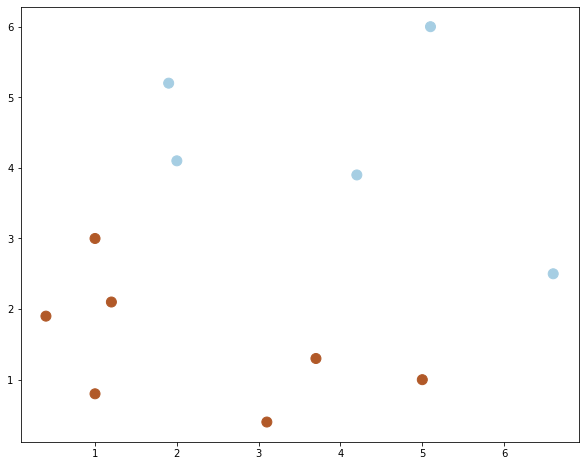

In [10]:
X = np.array([[1.0,3.0],[5.0,1.0],[3.7,1.3],[3.1,0.4],[1.0,0.8],[1.2,2.1],[0.4,1.9],[2.0,4.1],[6.6,2.5],[4.2,3.9],[5.1,6.0],[1.9,5.2]])
y = np.array([1,1,1,1,1,1,1,-1,-1,-1,-1,-1])
print(X.shape,'\n',X)
print(y.shape,'\n',y)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap=plt.cm.Paired)
plt.show()

## Fit SVM

We perform an SVM fit which solves the quadractic optimization problem to find the dual coefficients with our support vectors.  

In [11]:
clf = svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)


SVC(C=1000, kernel='linear')

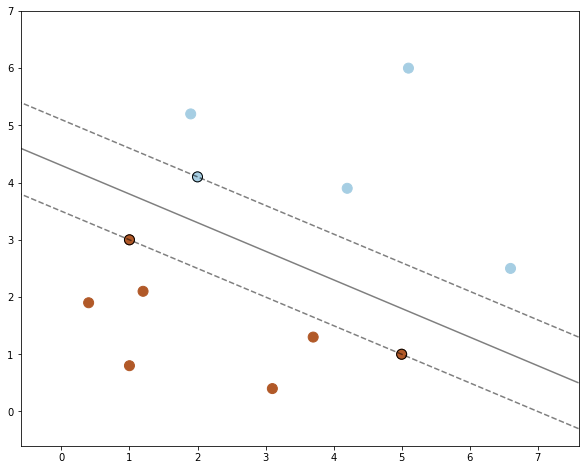

In [16]:
plt.figure(figsize=(10,8))
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(X[:,0],X[:,1],c=y,s=100,cmap=plt.cm.Paired)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

## Interpretation
We can see in the above plot that we have a linear separating boundary.  This is the optimal decision boundary which maximizes the margin -- the separating distance between the two categories.  <br>

There are three samples which are useful in determining the position of the decision boundary.  These three samples are called the support vector.   We can formulate the decision boundary as a function of these three samples.  

In [36]:

print("W vector and b values:")
print("W =",clf.class_weight_)
print("b =",clf.intercept_)

print("\nIndices of the support vectors",clf.support_)

print('Support vectors:')
for i in range(len(clf.support_)):
  print("X: ",X[clf.support_[i],:],"    y:",y[clf.support_[i]],"   coef:",clf.dual_coef_[0,i])



W vector and b values:
W = [1. 1.]
b = [5.37349174]

Indices of the support vectors [7 0 1]
Support vectors:
X:  [2.  4.1]     y: -1    coef: -0.9762703734535669
X:  [1. 3.]     y: 1    coef: 0.8884060305323062
X:  [5. 1.]     y: 1    coef: 0.08786434292126083
